# Arquivo da Violência - Análise de Dados

Este notebook permite carregar e analisar os dados do Arquivo da Violência diretamente no Google Colab.

## Sobre os Dados

O Arquivo da Violência é uma iniciativa de código aberto que coleta e estrutura dados sobre mortes violentas no Brasil em tempo real, usando monitoramento automatizado de fontes jornalísticas.

**Importante**: Os dados são coletados automaticamente de fontes jornalísticas e podem conter erros ou omissões. Veja a página "Sobre" do projeto para mais detalhes sobre a metodologia e limitações.

## Como Usar

1. Execute as células abaixo na ordem
2. Os dados serão baixados automaticamente da API
3. Explore os dados usando os exemplos fornecidos ou crie suas próprias análises


## 1. Instalação de Dependências


In [2]:
# Instalar pacotes necessários
%pip install pandas matplotlib seaborn requests -q


## 2. Importar Bibliotecas


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import io
import requests
import os

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Bibliotecas importadas com sucesso!")


Matplotlib is building the font cache; this may take a moment.


✅ Bibliotecas importadas com sucesso!


## 3. Carregar Dados da API

Os dados são baixados diretamente da API do Arquivo da Violência.


In [ ]:
# URL da API - ajuste se necessário para seu ambiente
# Para produção: use a URL do site
# Para desenvolvimento local: use http://localhost:8000

# Detectar se estamos rodando localmente ou em produção
try:
    # Tenta detectar automaticamente a URL base
    # Se estiver rodando no Colab, use a URL de produção
    
    # URL padrão de produção (ajuste conforme necessário)
    # Você pode alterar esta URL para apontar para seu servidor
    BASE_URL = os.getenv('API_BASE_URL', 'https://arquivo-da-violencia.vercel.app')
    
    # Se a variável de ambiente não estiver definida, tenta localhost primeiro
    if BASE_URL == 'https://arquivo-da-violencia.vercel.app':
        # Tenta localhost primeiro (para desenvolvimento)
        try:
            test_response = requests.get('http://localhost:8000/api/public/stats', timeout=2)
            if test_response.status_code == 200:
                BASE_URL = 'http://localhost:8000'
                print("🔧 Usando servidor local (localhost:8000)")
        except:
            print("🌐 Usando servidor de produção")
    else:
        print(f"🌐 Usando URL configurada: {BASE_URL}")
    
except Exception as e:
    BASE_URL = 'https://arquivo-da-violencia.vercel.app'
    print(f"⚠️  Usando URL padrão: {BASE_URL}")
    print(f"   (Erro ao detectar: {e})")

API_URL = f"{BASE_URL}/api/public/events/export"
print(f"\n📥 Baixando dados de: {API_URL}")


🔧 Usando servidor local (localhost:8000)

📥 Baixando dados de: http://localhost:8000/api/public/events/export


In [5]:
# Baixar dados CSV da API
try:
    response = requests.get(API_URL, timeout=30)
    response.raise_for_status()  # Levanta exceção se houver erro HTTP
    
    # Ler CSV diretamente do conteúdo da resposta
    df = pd.read_csv(io.StringIO(response.text))
    
    print(f"✅ Dados carregados com sucesso!")
    print(f"📊 Total de eventos: {len(df):,}")
    print(f"📅 Data do download: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
except requests.exceptions.RequestException as e:
    print(f"❌ Erro ao baixar dados: {e}")
    print(f"\n💡 Dicas:")
    print(f"   - Verifique se a URL da API está correta")
    print(f"   - Se estiver usando servidor local, certifique-se de que está rodando")
    print(f"   - Você pode alterar a BASE_URL na célula anterior")
    raise


✅ Dados carregados com sucesso!
📊 Total de eventos: 3
📅 Data do download: 2025-12-22 20:10:47


## 4. Explorar os Dados


In [6]:
# Informações gerais sobre o dataset
print("📋 Informações do Dataset:")
print(f"   Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
if 'event_date' in df.columns and df['event_date'].notna().any():
    print(f"   Período: {df['event_date'].min()} a {df['event_date'].max()}")
print(f"\n📊 Colunas disponíveis ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")


📋 Informações do Dataset:
   Dimensões: 3 linhas × 38 colunas
   Período: 2025-12-19T00:00:00 a 2025-12-21T12:00:00

📊 Colunas disponíveis (38):
    1. id
    2. homicide_type
    3. method_of_death
    4. event_date
    5. date_precision
    6. time_of_day
    7. country
    8. state
    9. city
   10. neighborhood
   11. street
   12. establishment
   13. full_location_description
   14. latitude
   15. longitude
   16. plus_code
   17. place_id
   18. formatted_address
   19. location_precision
   20. geocoding_source
   21. geocoding_confidence
   22. victim_count
   23. identified_victim_count
   24. victims_summary
   25. perpetrator_count
   26. identified_perpetrator_count
   27. security_force_involved
   28. title
   29. chronological_description
   30. additional_context
   31. merged_data
   32. source_count
   33. confirmed
   34. needs_enrichment
   35. last_enriched_at
   36. enrichment_model
   37. created_at
   38. updated_at


In [7]:
# Primeiras linhas do dataset
df.head(10)


,id,homicide_type,method_of_death,event_date,date_precision,time_of_day,country,state,city,neighborhood,...,chronological_description,additional_context,merged_data,source_count,confirmed,needs_enrichment,last_enriched_at,enrichment_model,created_at,updated_at
0,3,Homicídio,NaN,2025-12-21T12:00:00,NaN,NaN,Brasil,RJ,Rio de Janeiro,NaN,...,Evento de teste criado para validar a contagem...,NaN,NaN,1,False,True,NaN,NaN,2025-12-21T22:28:57.692206,2025-12-21T22:28:57.692210
1,1,Outro,Atropelamento,2025-12-20T00:00:00,exata,noite,Brasil,RS,Carazinho,NaN,...,"Em 20/12/2025, por volta das 23h15, ocorreu um...",Fabiel Riboli Largo era pai de Larissa Pedroso...,"{""location_info"": {""neighborhood"": null, ""stre...",1,False,False,2025-12-21T05:56:23,gemini-2.5-flash,2025-12-21T05:53:25,2025-12-21T05:56:23
2,2,Homicídio,Arma de fogo,2025-12-19T00:00:00,exata,não informado,Brasil,SP,São Paulo,Favela do Moinho,...,"Em 19 de dezembro de 2025, durante uma operaçã...",A operação cumpria mandados de busca e apreens...,"{""location_info"": {""neighborhood"": null, ""stre...",1,False,False,2025-12-21T05:56:30,gemini-2.5-flash,2025-12-21T05:53:25,2025-12-21T05:56:30


In [8]:
# Informações sobre tipos de dados e valores nulos
print("📊 Informações sobre Tipos de Dados e Valores Nulos:\n")
info_df = pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores Não-Nulos': df.count(),
    'Valores Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df.to_string())


📊 Informações sobre Tipos de Dados e Valores Nulos:

                                 Tipo  Valores Não-Nulos  Valores Nulos  % Nulos
id                              int64                  3              0     0.00
homicide_type                  object                  3              0     0.00
method_of_death                object                  2              1    33.33
event_date                     object                  3              0     0.00
date_precision                 object                  2              1    33.33
time_of_day                    object                  2              1    33.33
country                        object                  3              0     0.00
state                          object                  3              0     0.00
city                           object                  3              0     0.00
neighborhood                   object                  1              2    66.67
street                         object                  1

## 5. Análises Básicas


In [9]:
# Converter event_date para datetime se ainda não estiver
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Estatísticas básicas
print("📈 Estatísticas Básicas:\n")
print(f"Total de eventos: {len(df):,}")
print(f"Eventos com data: {df['event_date'].notna().sum():,}")
if 'victim_count' in df.columns:
    print(f"Total de vítimas (soma): {df['victim_count'].sum():.0f}")
    print(f"Média de vítimas por evento: {df['victim_count'].mean():.2f}")
if 'state' in df.columns:
    print(f"\nEstados com mais eventos:")
    print(df['state'].value_counts().head(10))


📈 Estatísticas Básicas:

Total de eventos: 3
Eventos com data: 3
Total de vítimas (soma): 7
Média de vítimas por evento: 2.33

Estados com mais eventos:
state
RJ    1
RS    1
SP    1
Name: count, dtype: int64


In [10]:
# Distribuição por tipo de homicídio
if 'homicide_type' in df.columns:
    print("🔍 Distribuição por Tipo de Homicídio:\n")
    homicide_counts = df['homicide_type'].value_counts()
    print(homicide_counts)
    print(f"\nTotal: {homicide_counts.sum():,} eventos")


🔍 Distribuição por Tipo de Homicídio:

homicide_type
Homicídio    2
Outro        1
Name: count, dtype: int64

Total: 3 eventos


In [11]:
# Distribuição por método de morte
if 'method_of_death' in df.columns:
    print("🔍 Distribuição por Método de Morte:\n")
    method_counts = df['method_of_death'].value_counts()
    print(method_counts.head(10))


🔍 Distribuição por Método de Morte:

method_of_death
Atropelamento    1
Arma de fogo     1
Name: count, dtype: int64


## 6. Visualizações


/var/folders/42/tn5vqzlx32qb2m551phgrgbw0000gp/T/ipykernel_5467/609382078.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


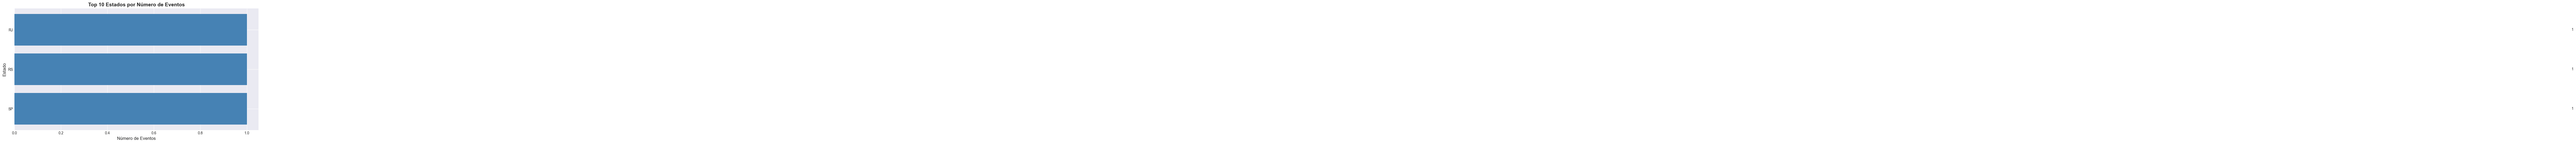

In [12]:
# Gráfico 1: Eventos por Estado (Top 10)
if 'state' in df.columns:
    plt.figure(figsize=(12, 6))
    top_states = df['state'].value_counts().head(10)
    plt.barh(top_states.index, top_states.values, color='steelblue')
    plt.xlabel('Número de Eventos', fontsize=12)
    plt.ylabel('Estado', fontsize=12)
    plt.title('Top 10 Estados por Número de Eventos', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    for i, v in enumerate(top_states.values):
        plt.text(v + 10, i, str(v), va='center')
    plt.tight_layout()
    plt.show()


/var/folders/42/tn5vqzlx32qb2m551phgrgbw0000gp/T/ipykernel_5467/2536986460.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


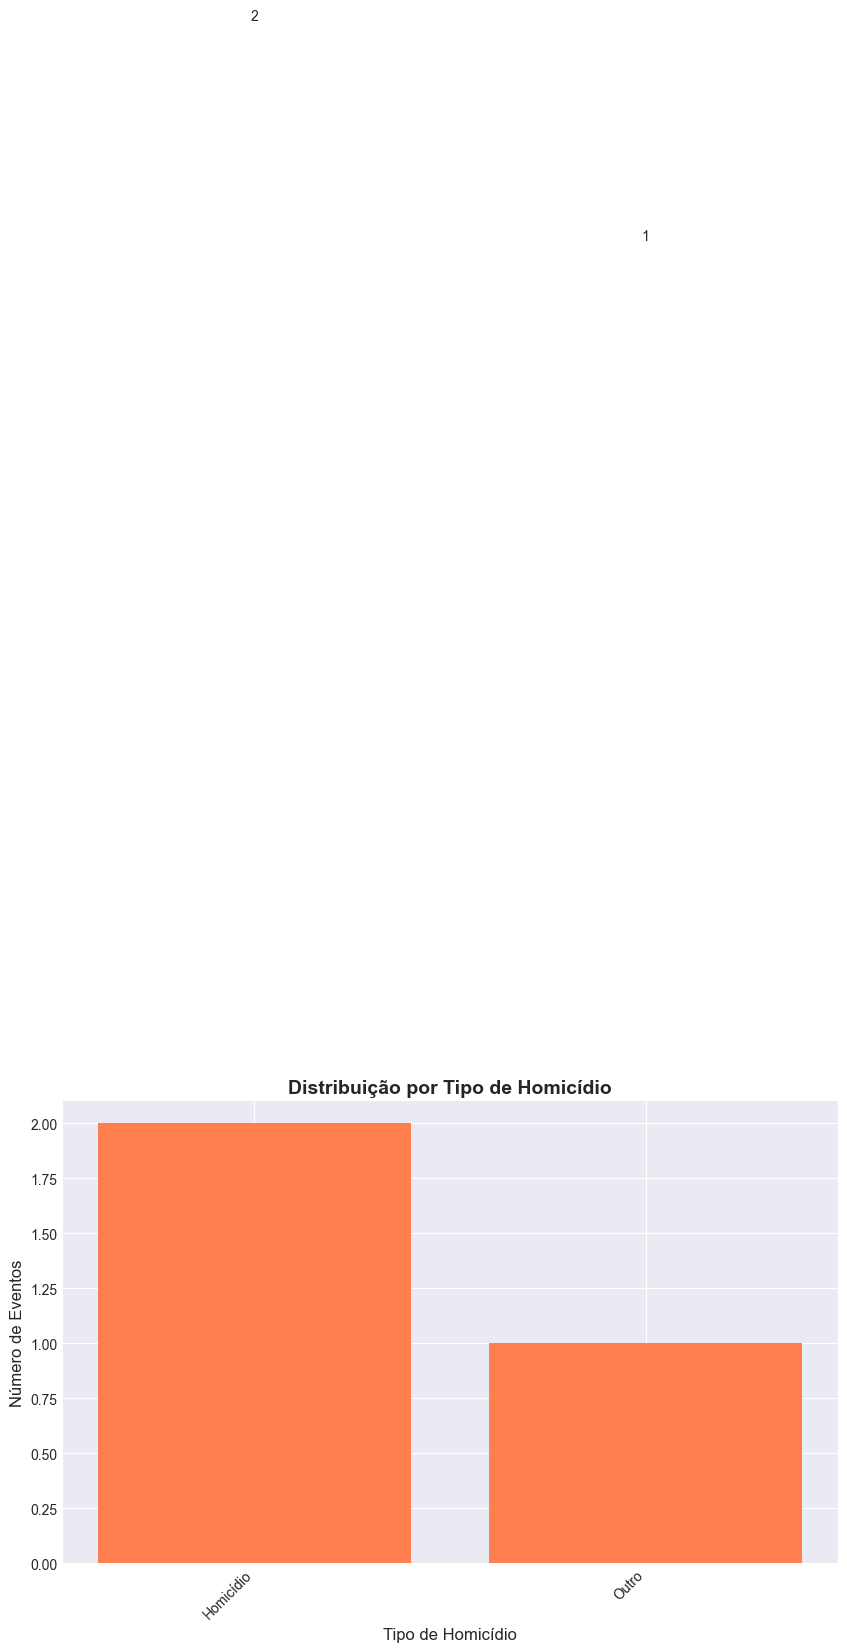

In [13]:
# Gráfico 2: Distribuição por Tipo de Homicídio
if 'homicide_type' in df.columns:
    plt.figure(figsize=(10, 6))
    homicide_counts = df['homicide_type'].value_counts()
    plt.bar(range(len(homicide_counts)), homicide_counts.values, color='coral')
    plt.xticks(range(len(homicide_counts)), homicide_counts.index, rotation=45, ha='right')
    plt.xlabel('Tipo de Homicídio', fontsize=12)
    plt.ylabel('Número de Eventos', fontsize=12)
    plt.title('Distribuição por Tipo de Homicídio', fontsize=14, fontweight='bold')
    for i, v in enumerate(homicide_counts.values):
        plt.text(i, v + 5, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()


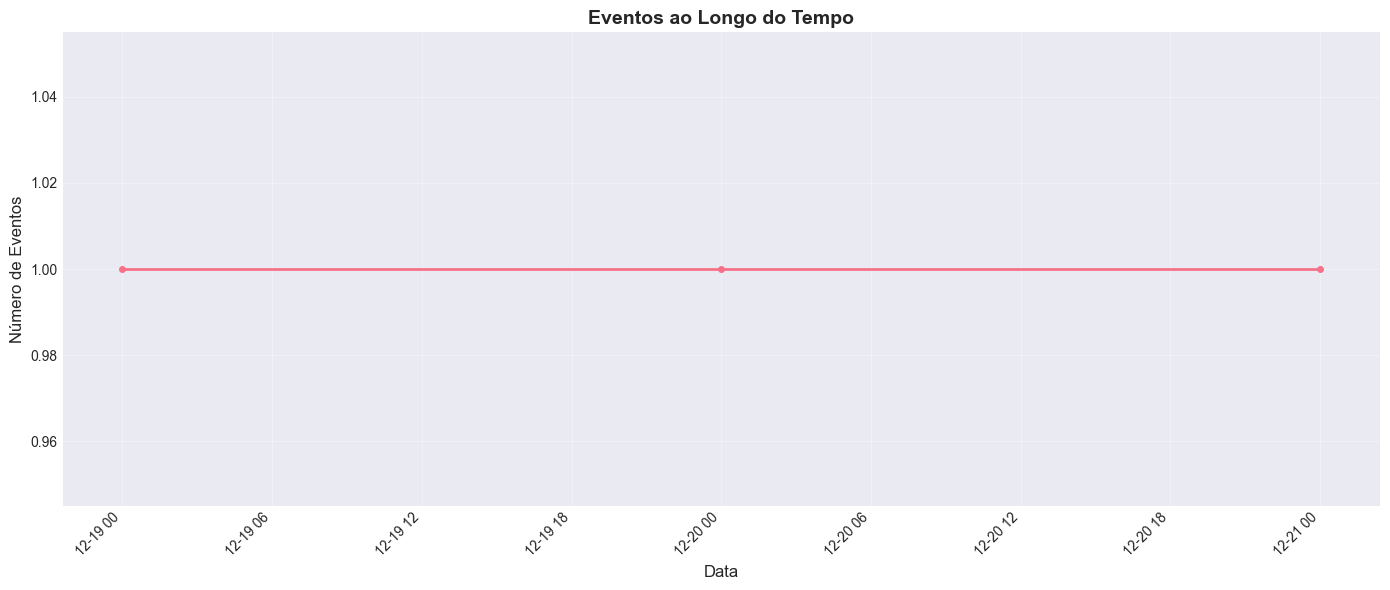

In [14]:
# Gráfico 3: Eventos ao Longo do Tempo (se houver dados de data)
if 'event_date' in df.columns and df['event_date'].notna().sum() > 0:
    plt.figure(figsize=(14, 6))
    df_with_date = df[df['event_date'].notna()].copy()
    df_with_date['date'] = pd.to_datetime(df_with_date['event_date']).dt.date
    daily_counts = df_with_date.groupby('date').size()
    
    plt.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=4)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Número de Eventos', fontsize=12)
    plt.title('Eventos ao Longo do Tempo', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Não há dados de data suficientes para criar o gráfico temporal")


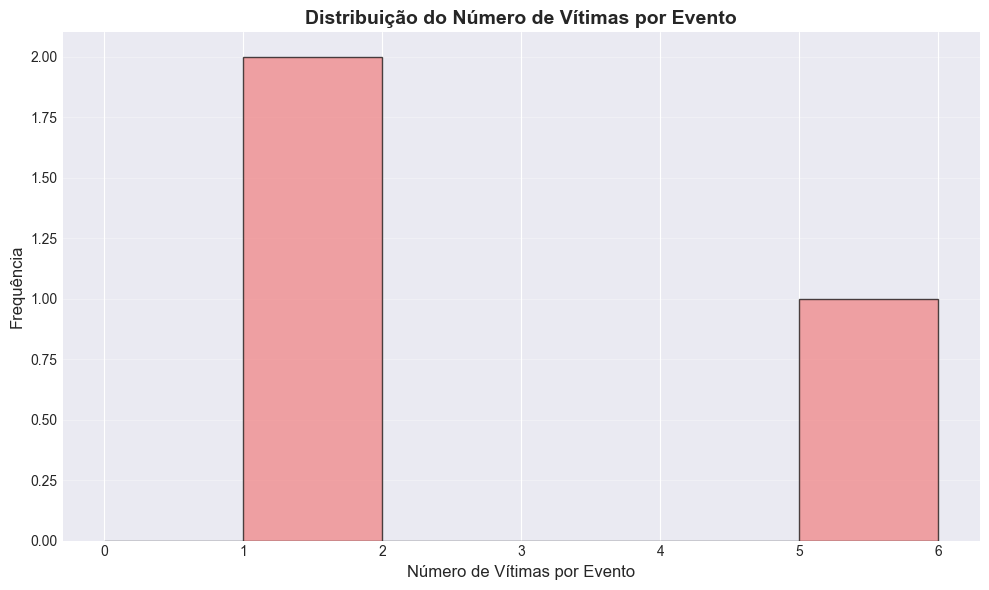

Estatísticas de vítimas:
  Média: 2.33
  Mediana: 1
  Máximo: 5


In [15]:
# Gráfico 4: Distribuição de Vítimas por Evento
if 'victim_count' in df.columns:
    plt.figure(figsize=(10, 6))
    victim_data = df[df['victim_count'].notna()]['victim_count']
    if len(victim_data) > 0:
        plt.hist(victim_data, bins=range(0, int(victim_data.max()) + 2), edgecolor='black', alpha=0.7, color='lightcoral')
        plt.xlabel('Número de Vítimas por Evento', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.title('Distribuição do Número de Vítimas por Evento', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        print(f"Estatísticas de vítimas:")
        print(f"  Média: {victim_data.mean():.2f}")
        print(f"  Mediana: {victim_data.median():.0f}")
        print(f"  Máximo: {victim_data.max():.0f}")


## 7. Análises Personalizadas

Agora você pode criar suas próprias análises! O DataFrame `df` contém todos os dados.

### Exemplos de Consultas Úteis:


In [16]:
# Exemplo 1: Filtrar eventos por estado
# df_sp = df[df['state'] == 'SP']
# print(f"Eventos em SP: {len(df_sp)}")

# Exemplo 2: Filtrar eventos com envolvimento de forças de segurança
# df_security = df[df['security_force_involved'] == True]
# print(f"Eventos com envolvimento de forças de segurança: {len(df_security)}")

# Exemplo 3: Eventos por cidade
# city_counts = df['city'].value_counts().head(10)
# print(city_counts)

print("💡 Descomente e modifique os exemplos acima para suas análises!")


💡 Descomente e modifique os exemplos acima para suas análises!


## 8. Exportar Resultados

Você pode exportar dados filtrados ou análises para outros formatos:


In [17]:
# Exemplo: Salvar DataFrame filtrado
# df_filtered = df[df['state'] == 'RJ']
# df_filtered.to_csv('eventos_rj.csv', index=False)
# print("✅ Dados exportados para 'eventos_rj.csv'")

print("💡 Descomente o código acima para exportar dados filtrados!")


💡 Descomente o código acima para exportar dados filtrados!


## Recursos Adicionais

- **Repositório GitHub**: https://github.com/JoaoCarabetta/arquivo-da-violencia
- **Documentação**: Veja a página "Sobre" do projeto para entender a metodologia
- **Dicionário de Dados**: Consulte a página "Dados" para ver todos os campos disponíveis

## Avisos Importantes

⚠️ **Limitações dos Dados**:
- Os dados são coletados automaticamente de fontes jornalísticas
- Podem conter erros ou omissões
- Apenas mortes noticiadas pela mídia são capturadas
- Regiões com mais cobertura jornalística terão mais eventos registrados

📊 **Uso Responsável**:
- Use os dados com cautela em análises estatísticas
- Considere os vieses de cobertura jornalística
- Cite o Arquivo da Violência ao usar estes dados
